In [1]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler as mms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
#First i save the url as a variable
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv'

#Reading the csv from the URL given above and telling python that the separator/delimiter is ','
df = pd.read_csv(url, sep=',')

#Showing the table
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


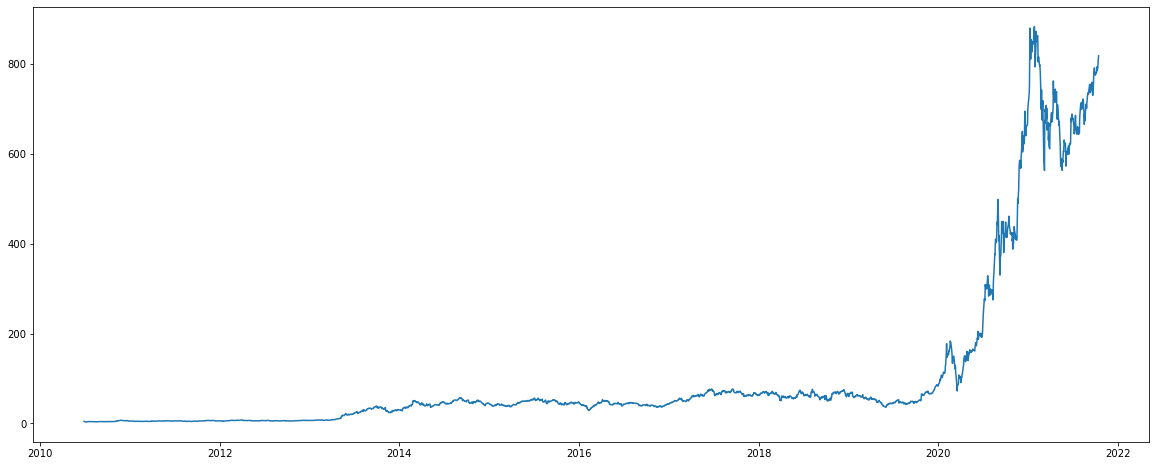

In [3]:
#Setting index as date

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#Ploting the closing prices
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label = 'Close price history')

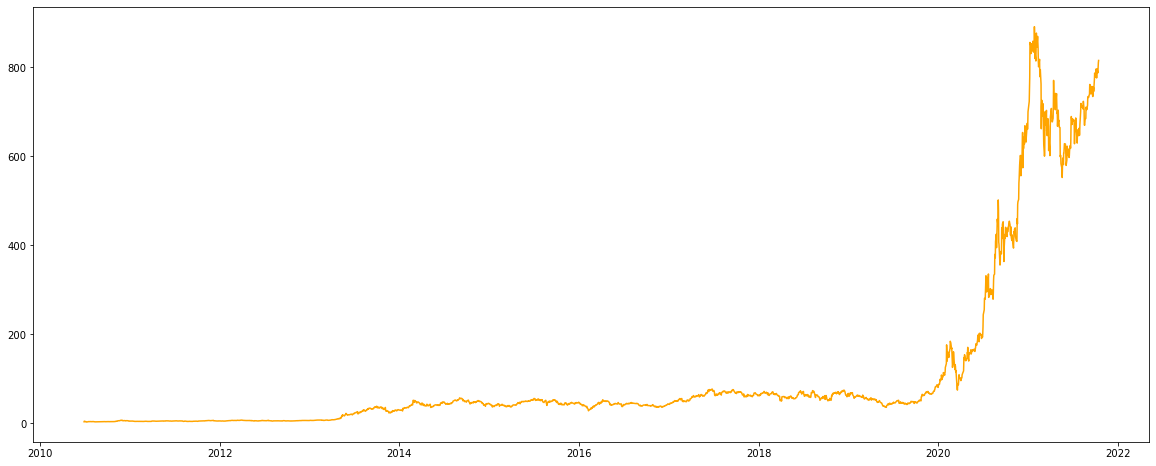

In [141]:
#Ploting the opening prices
plt.figure(figsize=(20,8))
plt.plot(df['Open'], color="orange", label = 'Open price history')

#This is probably unnessesary

##4.Train the algorithm using Python

In [5]:
#Preparing the data with a scaler from the 'sklearn' library

scaler = mms(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 90

#Preparing two empty arrays
x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0 ])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [6]:
#Building a model from the 'tensorflow' library
model = Sequential()

#Adding layers to the model
#LSTM (Long short-term memory) is an artifcial recurrent neural network (RNN) architecture mostly used in deep learning.
#It will choose different implementations to maximize the performance
model.add(LSTM(units=50, return_sequences = True, input_shape =(x_train.shape[1], 1)))
#The dropout layer randomly sets input units to 0 with a frequency of rate at each step during trainig time, which helps prevent overfitting.
model.add(Dropout(0.2))
#Adding more layers for accuracy
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Prediction of the next closing value
#Dense is used to create fully connected layers, in which every depends on every input.  
model.add(Dense(units=1))

#The 'Adam' optimizer is an efficent stocastic optimizer developed by OpenAI
#https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
#The 'loss-funtion':
#Computes the mean of squares of errors between labels and predictions.
model.compile(optimizer='adam', loss='mean_squared_error')


#Alter 'epcohs' (i.e. 25, 50, 100) for more accurate predictions
#Note: the higher the value of 'epochs' the longer it takes to train the model, but the more acurate the predictions will be
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
87/87 [==============================] - 9s 59ms/step - loss: 0.0061
Epoch 2/25
87/87 [==============================] - 5s 57ms/step - loss: 0.0015
Epoch 3/25
87/87 [==============================] - 5s 58ms/step - loss: 0.0013
Epoch 4/25
87/87 [==============================] - 6s 72ms/step - loss: 0.0013
Epoch 5/25
87/87 [==============================] - 6s 65ms/step - loss: 0.0013
Epoch 6/25
87/87 [==============================] - 6s 70ms/step - loss: 0.0013
Epoch 7/25
87/87 [==============================] - 6s 67ms/step - loss: 0.0011
Epoch 8/25
87/87 [==============================] - 5s 63ms/step - loss: 0.0012
Epoch 9/25
87/87 [==============================] - 5s 59ms/step - loss: 9.3582e-04
Epoch 10/25
87/87 [==============================] - 5s 58ms/step - loss: 0.0010
Epoch 11/25
87/87 [==============================] - 5s 58ms/step - loss: 0.0012
Epoch 12/25
87/87 [==============================] - 5s 58ms/step - loss: 7.5759e-04
Epoch 13/25
87/87 [==========

In [7]:
#Loading test data
test_data = df
#Loading the actual closinig prices
actual_prices = test_data['Close'].values

#Using the pandas lib to concatinate the two lists 'df' and 'test_data'
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

#Preparing the inputs 
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

#Making predictions on test data
x_test = []

for x in range(prediction_days, len(model_inputs + 50)):
    x_test.append(model_inputs[x - prediction_days : x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


## Plotting the predictions 

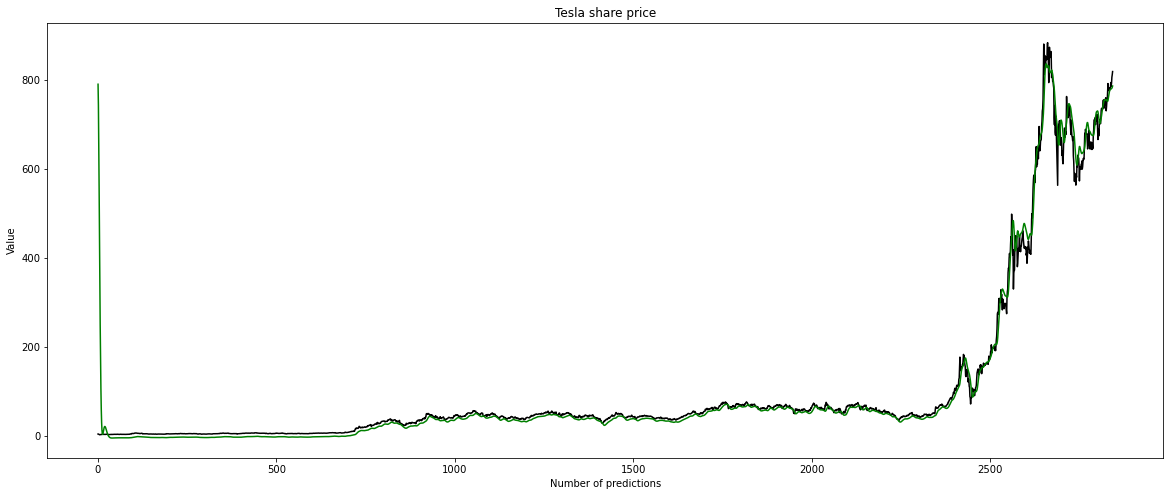

In [8]:
#Ploting the predictions

plt.figure(figsize=(20,8))
plt.title("Tesla share price")
plt.xlabel("Number of predictions")
plt.ylabel("Value")
plt.plot(actual_prices, color="black", label="Actual stock price")
plt.plot(predicted_prices, color="green", label = "Predicted stock prices")

#Alter 'epcohs' (i.e. 25, 50, 100) for more accurate predictions

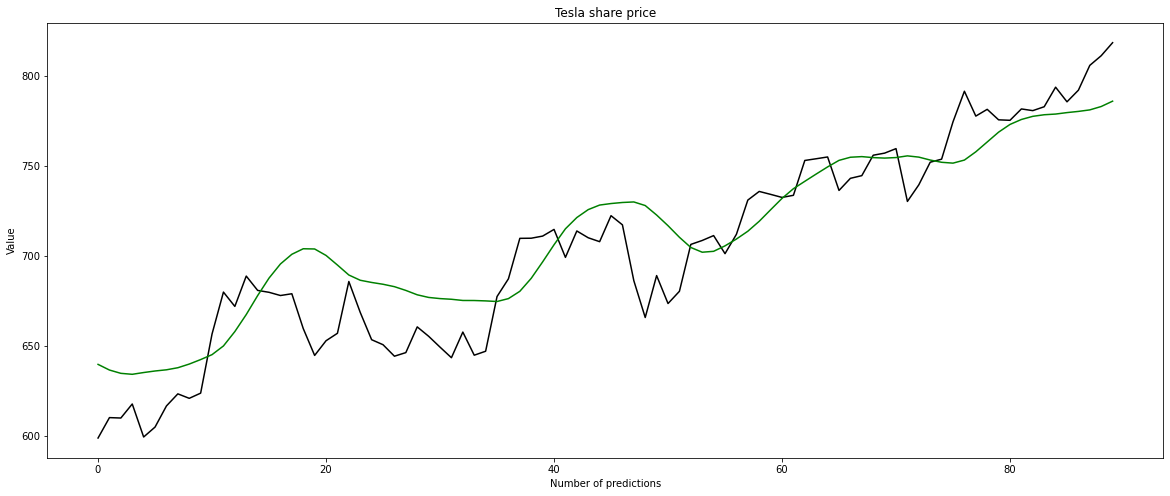

In [9]:
#Scaling down to the last 90 days for a more clear read
#NB! This graph will be altered if 'prediction_days' is altered

plt.figure(figsize=(20,8))
plt.title("Tesla share price")
plt.xlabel("Number of predictions")
plt.ylabel("Value")
plt.plot(actual_prices[len(actual_prices)-prediction_days:len(actual_prices)], color="black", label="Actual stock price")
plt.plot(predicted_prices[len(predicted_prices)-prediction_days:len(predicted_prices)], color="green", label = "Predicted stock prices")

## Predicting the next day's value

In [17]:
#Predicting the next day
x = 1

real_data = [model_inputs[len(model_inputs) + x - prediction_days:len(model_inputs + x), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction) 
    
#values = np.append(values, prediction)

last_value = actual_prices[len(actual_prices)-1]

print("The last closnig value was:", last_value)
print("The next day's predicted value is:" ,prediction)
    


The last closnig value was: 818.320007
The next day's predicted value is: [[789.8504]]


## Calculating the percentages

In [12]:
correct_predictions = 0
incorrect_predictions = 0

#As long as the predicted value is in range +- 1.5 we will consider it a correct prediction
for i in range (len(x_test)):
    if actual_prices[i] - 1.5 < predicted_prices[i] and predicted_prices[i] < actual_prices[i] + 1.5:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print('Total predictions: ', len(x_test))
print('Number of correct predictions: ', correct_predictions)
print('Number of incorrect predictions: ', incorrect_predictions)
#Printing an empty linie for estetics
print()

#Calculating percentage of correct predictions
percent = (correct_predictions / len(x_test)) * 100
#Formating the percentage to two decimals
format_percent = "{:.2f}".format(percent)
print('Percentage of correct predictions: ', format_percent, "%")

#Calculating percentage of incorrect predictions
off_percent = (incorrect_predictions / len(x_test) * 100) 
#Formating the percentage to two decimals
format_offpercent = "{:.2f}".format(off_percent)
print('Percentage of incorrect predictions: ', format_offpercent, "%")

Total predictions:  2845
Number of correct predictions:  151
Number of incorrect predictions:  2694

Percentage of correct predictions:  5.31 %
Percentage of incorrect predictions:  94.69 %


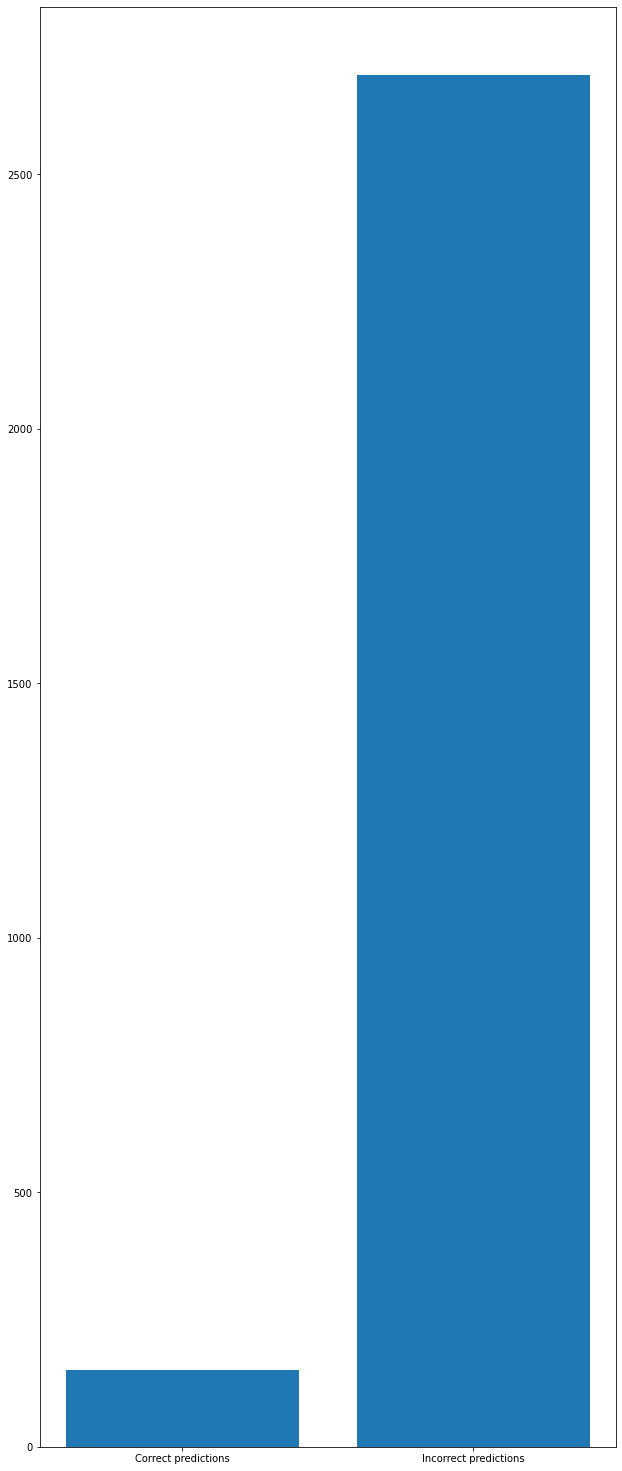

In [13]:
#Plotting the numbers

figure = plt.figure(figsize=(8,10))
axis = figure.add_axes([0,4,1,2])
names = ['Correct predictions', 'Incorrect predictions']
numbers = [correct_predictions, incorrect_predictions]
axis.bar(names, numbers)
plt.show()
